# Product of Two Gaussian Variates
 >__Created__:  4 June 2019 Harrison B. Prosper, INFN SOS 2019, Paestum, Italy<br>
 >__Updated__: October 2021 for LPC Stats 2021
 
We approximate the density of the product $t = x \, y$ of two
 standard Gaussian variates $x$ and $y$ by simulation and compare the simulated density to the exact result. The domain of $t$ is
 $(-\infty, \infty)$.

The density of a standard Gaussian variate $z$ is $g(z) = \exp(-\frac{1}{2} z^2) \, / \sqrt{2\pi}$, therefore, the density, $p(t)$, can be written as

\begin{align*}
p(t) &= \int_{-\infty}^{\infty}  \int_{-\infty}^{\infty} \delta(t - x \, y) \, g(x) \, g(y) \, dx \, dy ,\\
&= \frac{1}{2\pi}\int_{-\infty}^{\infty} e^{-\frac{1}{2} x^2} \,
    \left[ \int_{-\infty}^{\infty} \delta(t - x \, y) \, e^{-\frac{1}{2} y^2} \, dy \right] \, dx.
\end{align*}

Transforming
\begin{align*}
p(t) 
&= \frac{1}{2\pi}\int_{-\infty}^{\infty} 
    \int_{-\infty}^{\infty} \delta(t - x \, y) \, e^{-\frac{1}{2} (x^2 + y^2)} \, dx \, dy,
\end{align*}
to polar coordinates ($x = r \cos\phi, y = r \sin\phi$, $r \in (0, \infty), \phi \in (0, 2\pi))$ yields

\begin{align*}
p(t) 
&= \frac{1}{2\pi}\int_{0}^{2\pi}  d\phi
    \int_{0}^{\infty} \delta(t - r^2 \sin\phi\cos\phi) \, e^{-\frac{1}{2} r^2} \, r \, dr,\\
&= \frac{1}{2\pi}\int_{0}^{2\pi}  d\phi
    \int_{0}^{\infty} \delta(t - u \sin 2\phi) \, e^{-u} \, du, \text{ where } u = r^2 \, / \, 2 .    
\end{align*}

Writing $h(u) = t - u \sin 2 \phi$ and using $\delta(h(u)) = \delta(u - u_0) \, / \, |dh/du|$, where $u_0 = t \, /  \sin 2 \phi \geq 0$ is the solution of $h(u) = 0$, we can write $\delta(h) = \delta(u - u_0)/ |\sin 2 \phi|$. Therefore, 
\begin{align*}
p(t) &= \frac{1}{2\pi}\int_{0}^{2\pi} 
     \frac{e^{- t \, / \sin 2 \phi}}{\sin 2 \phi} \, d\phi,
\end{align*}

subject to the constraints $\color{blue}{\sin 2\phi \geq 0}$ and 
$\color{blue}{t \, / \sin 2 \phi \geq 0}$.
These constraints imply that $\phi$ is restricted to the 1st and 3rd quadrant in the $x, y$ plane (that is, $\phi \in (0, \pi / 2)\,\cup \, (\pi, 3\pi / 2)$) and $t$ must be replaced by $|t|$. Moreover, since the integral in the 1st and 3rd quadrants have the same value we can limit the integration to the 1st quadrant and multiple the integral by 2. This leads to
\begin{align*}
p(t) &= \frac{1}{\pi}\int_{0}^{\pi/2} 
     \frac{e^{- |t| \, / \sin 2 \phi}}{\sin 2 \phi} \, d\phi,
\end{align*}

which, with the substitution, $2 \phi = \pi z$, yields,
\begin{align*}
 p(t) &= \frac{1}{2}\int_{0}^{1} 
     \frac{e^{- |t| \, / \sin \pi z}}{\sin \pi z} \, dz.
\end{align*}


### Alternative representation

Using the identity $\delta(h(y)) = \delta(y - y_0) \, / \, |dh\,/\,dy|$ and noting that $y_0 = t \, / \, x$ is the solution of $h(y) = t - x y = 0$, we can write

\begin{align*}
p(t) &= \frac{1}{2\pi}\int_{-\infty}^{\infty} e^{-\frac{1}{2} x^2} \,
    \left[ \int_{-\infty}^{\infty} \frac{\delta(y - y_0)}{|x|} \, e^{-\frac{1}{2} y^2} \, dy \right] \, dx, \\
    &= \frac{1}{2\pi}\int_{-\infty}^{\infty} e^{-\frac{1}{2} x^2} \,
    \frac{1}{|x|} \, e^{-\frac{1}{2} t^2 x^{-2}} \, dx.
\end{align*}

Since the integrand is an even function of $x$, the integral can be written
as

\begin{align*}
p(t) &= \frac{1}{\pi}\int_0^{\infty} e^{-\frac{1}{2}( x^2 \, +\, t^2 x^{-2})} \, \frac{dx}{x}.
\end{align*}

With the substitution $x = z \, / \, (1 - z)$, $p(t)$ can be expressed as

$$p(t) = \frac{1}{\pi} \int_{0}^{1} \frac{\exp\left[- \left(z^{2} (1 - z)^{-2} + t^{2}z^{-2} (1 - z)^{2} \right)/2\right]}{z (1 - z)}
 \, dz.$$





In [1]:
# standard system modules
import os, sys

# standard array manipulation module
import numpy as np

# standard scientific python module
import scipy as sp
import scipy.stats as st
import scipy.integrate as integrate

# standard symbolic algebra module
import sympy as sm
sm.init_printing()

# standard plotting module
import matplotlib as mp
import matplotlib.pyplot as plt
import pylab as pl

# arbitrary precision real and complex calculation
#import mpmath

# make plots appear inline
%matplotlib inline

In [2]:
# update fonts
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 20
        }
mp.rc('font', **font)
mp.rc('xtick', labelsize='x-small')
mp.rc('ytick', labelsize='x-small')
mp.rc('text', usetex=True)

# set a seed to ensure reproducibility 
# on a given machine
seed = 111
rnd  = np.random.RandomState(seed)

### Generate $x$ and $y$ data from Gaussian distribution

In [3]:
N = 500000
x = rnd.normal(0, 1, N)
y = rnd.normal(0, 1, N)
t = [X*Y for X, Y in zip(x, y)]

### Histogram $t = x y$ and compare with the density

In [6]:
def pdf1(t, N=100, zmin=0.0, zmax=1.0):
    def F(t, z):
        tt = t*t
        zz = (z/(1 - z))**2
        return np.exp(-(zz + tt/zz)/2)/(z*(1 - z))
    dz = (zmax-zmin)/N
    a = dz / np.pi
    return a * sum([F(t, zmin + (i+0.5)*dz) for i in range(N)])
print('%10.9f' % pdf1(1))

0.134016241


In [7]:
def pdf2(t, N=100, zmin=0.0, zmax=1.0):
    def F(t, z):
        s = np.sin(np.pi*z)
        y = sm.exp(- np.abs(t) / s) / s
        return y
    
    dz = (zmax-zmin)/N
    a = dz / 2
    return a*np.sum([F(t, zmin + (i+0.5)*dz) for i in range(N)])
print('%10.9f' % pdf2(1))

0.134016241


In [13]:
def plotData(t, text, pdf,
             nbins=600, 
             xmin=-6, xmax=6,
             ymin= 0, ymax=2.0,
             ftsize=24, 
             color=(0.1,0.3,0.8), 
             fgsize=(8,5)):

    # set size of figure
    plt.figure(figsize=fgsize)
    
    # histogram data
    # returns y, x, o
    # y: counts
    # x: bin boundaries
    # o: objects (not used, hence the use of "_")
    y, x, _ = plt.hist(t, 
                       bins=nbins, 
                       color=color,
                       alpha=0.20,
                       range=(xmin, xmax), 
                       density=True)

    # convert bin boundaries to bin centers
    # Note: x[1:]  = x[1], x[2], ..., x[n-1]
    #       x[:-1] = x[0], x[1], ..., x[n-2]
    z  = (x[:-1] + x[1:])/2
    
    # superimpose density
    f  = [pdf(u) for u in z]
    plt.plot(z, f, color=(1,0,0), lw=2)
    
    # add legends 
    plt.legend(['exact', 
                'by simulation'])
    
    # set up x, y limits
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    
    # add x and y labels
    plt.xlabel('$t$', fontsize=ftsize)
    plt.ylabel('$p(t)$', fontsize=ftsize)
    
    # annotate 
    xwid = (xmax-xmin)/10
    ywid = (ymax-ymin)/10

    xpos = xmin + xwid/2
    ypos = ymin + 8.5*ywid
    plt.text(xpos, ypos, text, fontsize=22)
    # tighten layout so that image is fully
    # contained within viewport
    plt.tight_layout()
    plt.savefig("fig_product_of_two_gaussian_variates.pdf")
    plt.show()

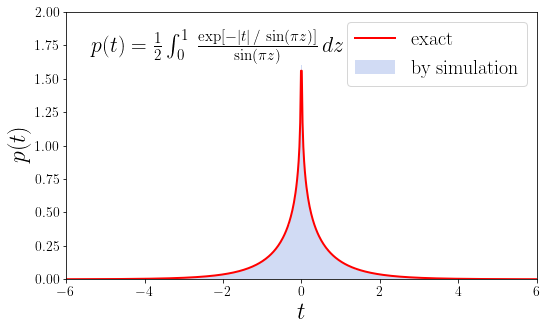

In [14]:
text1 =  r'$p(t) = \frac{1}{\pi} \int_{0}^{1} '\
        r'\frac{\exp\left[- \left(z^{2} (1 - z)^{-2}'\
        r' + t^{2}z^{-2} (1 - z)^{2} '\
        r'\right)/2\right]}{z (1 - z)} \, dz$'
text2 =  r'$p(t) = \frac{1}{2} \int_{0}^{1} \, '\
        r'\frac{\exp[- |t| \, / \, \sin (\pi z) ]}{\sin (\pi z)} \, dz$'

plotData(t, text2, pdf2)